In [11]:
from ppget.source import ModelSource
import matplotlib as mplt
mplt.rcParams["figure.figsize"] = (20,5)

start_date = "2007-07-01"
end_date = "2007-07-08"
feature = "Global_active_power"

source = ModelSource.load(start_date, end_date, feature)
source.missing_data()

Series([], Freq: H, Name: Global_active_power, dtype: float64)

In [12]:
series = source.series()
series.head()

timestamp
2007-07-01 00:00:00    2.493733
2007-07-01 01:00:00    0.990900
2007-07-01 02:00:00    0.789900
2007-07-01 03:00:00    0.287467
2007-07-01 04:00:00    0.515533
Freq: H, Name: Global_active_power, dtype: float64

In [13]:
import pandas as pd

values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.head(5)

,t,t+1
0,NaN,2.493733
1,2.493733,0.990900
2,0.990900,0.789900
3,0.789900,0.287467
4,0.287467,0.515533


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = dataframe.values
train_size = int(len(X) * 0.7)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

def model_baseline(x):
  return x

def RMSE(expected, predicted):
    return sqrt(mean_squared_error(expected, predicted))

def validate_model(model, cost, expected, validation):
    p = [model(x) for x in validation]
    return cost(expected, p), p

In [15]:
%%time
error, predictions = validate_model(model=model_baseline,
                                    cost=RMSE,
                                    expected=test_y,
                                    validation=test_X)

print(f"Baseline RMSE: {error}")

Baseline RMSE: 0.805271735851999
CPU times: user 1.16 ms, sys: 397 µs, total: 1.55 ms
Wall time: 1.32 ms


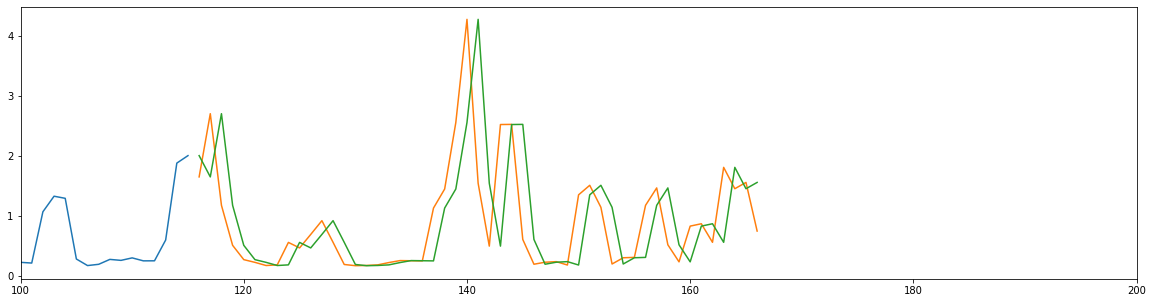

In [17]:
import matplotlib.pyplot as plt

plt.xlim([100, 200])
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()